In [50]:
import pandas as pd

df_1 = pd.read_csv('../fact/valid_merge_1.csv')
df_2 = pd.read_csv('../fact/valid_merge_2.csv')
df_3 = pd.read_csv('../fact/valid_merge_3.csv')
df_4 = pd.read_csv('../fact/valid_merge_4.csv')
df_5 = pd.read_csv('../fact/valid_merge_5.csv')

df = pd.concat([df_1, df_2, df_3, df_4, df_5]).reset_index(drop=True)
df_train = pd.read_csv('../data/train.csv')

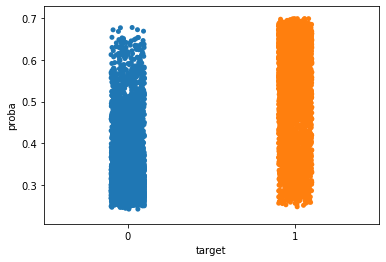

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.stripplot(data=df[['proba', 'target']], x='target', y='proba')

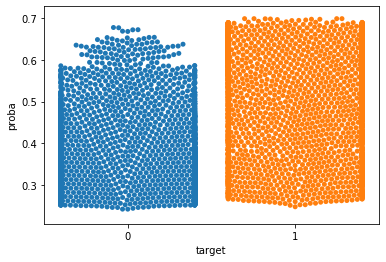

In [24]:
sns.swarmplot(data=df[['proba', 'target']], x='target', y='proba')

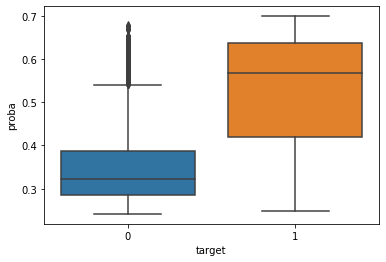

In [25]:
sns.boxplot(data=df[['proba', 'target']], x='target', y='proba')

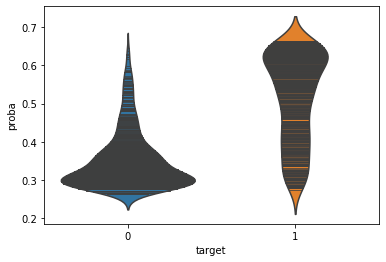

In [26]:
sns.violinplot(data=df_1[['proba', 'target']], x='target', y='proba', inner='stick')

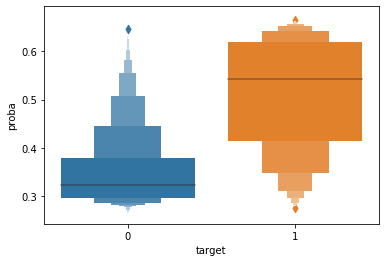

In [27]:
sns.boxenplot(data=df_1[['proba', 'target']], x='target', y='proba')

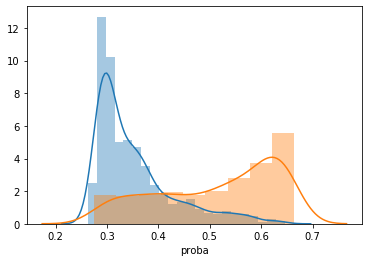

In [28]:
sns.distplot(df_1[df_1['target']==0].proba, kde=True, rug=False)
sns.distplot(df_1[df_1['target']==1].proba, kde=True, rug=False)

In [29]:
df

,id,proba,target
0,1775,0.635098,1
1,7205,0.493443,1
2,4712,0.516484,1
3,2213,0.381219,1
4,8029,0.380878,1
...,...,...,...
7608,1499,0.251272,0
7609,8320,0.435798,0
7610,7025,0.270593,0
7611,3742,0.308730,0


In [46]:
from sklearn.metrics import confusion_matrix

tp, fn, fp, tn = confusion_matrix(df.target, df.proba >= 0.5).ravel()
tp, fn, fp, tn

(3983, 359, 1214, 2057)

In [44]:
i_fn = (df.target == 0) & (df.proba >= 0.5)
i_fp = (df.target == 1) & (df.proba < 0.5)

In [66]:
pd.merge(df[i_fn], df_train, on='id')[
    ['keyword', 'location', 'text', 'proba']
].to_csv('../fact/fn.csv', index=None)

In [67]:
pd.merge(df[i_fp], df_train, on='id')[
    ['keyword', 'location', 'text', 'proba']
].to_csv('../fact/fp.csv', index=None)

In [65]:
df

,id,proba,target
0,1775,0.635098,1
1,7205,0.493443,1
2,4712,0.516484,1
3,2213,0.381219,1
4,8029,0.380878,1
...,...,...,...
7608,1499,0.251272,0
7609,8320,0.435798,0
7610,7025,0.270593,0
7611,3742,0.308730,0
